In [130]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
plt.style.use('fivethirtyeight')

In [131]:
df = pd.read_csv("daily_data_new.csv", date_parser=True)
df = df.iloc[::-1]

In [132]:
df.head

<bound method NDFrame.head of             Date  Close   Open   High    Low   Vol.  Change %
1183   10/3/2010    0.1    0.1    0.1    0.1   7170      0.00
1182   10/4/2010    0.1    0.1    0.1    0.1  34000      0.00
1181   10/5/2010    0.1    0.1    0.1    0.1  27530      0.00
1180   10/6/2010    0.1    0.1    0.1    0.1  33430      0.00
1179   10/7/2010    0.1    0.1    0.1    0.1  43690      0.00
...          ...    ...    ...    ...    ...    ...       ...
4     12/25/2013  707.3  702.8  710.0  673.9   5340      0.01
3     12/26/2013  802.0  707.3  829.6  707.2  23530      0.13
2     12/27/2013  803.0  802.0  836.8  767.9  13890      0.00
1     12/28/2013  762.0  803.0  806.0  715.6  13340     -0.05
0     12/29/2013  785.0  762.0  804.0  735.0   7040      0.03

[1184 rows x 7 columns]>

In [133]:
data_training = df[df['Date']<'2012-01-01'].copy()
data_training

,Date,Close,Open,High,Low,Vol.,Change %
1183,10/3/2010,0.1,0.1,0.1,0.1,7170,0.00
1182,10/4/2010,0.1,0.1,0.1,0.1,34000,0.00
1181,10/5/2010,0.1,0.1,0.1,0.1,27530,0.00
1180,10/6/2010,0.1,0.1,0.1,0.1,33430,0.00
1179,10/7/2010,0.1,0.1,0.1,0.1,43690,0.00
...,...,...,...,...,...,...,...
4,12/25/2013,707.3,702.8,710.0,673.9,5340,0.01
3,12/26/2013,802.0,707.3,829.6,707.2,23530,0.13
2,12/27/2013,803.0,802.0,836.8,767.9,13890,0.00
1,12/28/2013,762.0,803.0,806.0,715.6,13340,-0.05


In [134]:
data_test = df[df['Date']>='2012-01-01'].copy()
data_test

,Date,Close,Open,High,Low,Vol.,Change %
1034,3/1/2011,0.9,0.9,1.0,0.9,22570,0.07
1033,3/2/2011,0.9,0.9,0.9,0.9,2740,0.00
1032,3/3/2011,0.9,0.9,0.9,0.9,2750,0.00
1031,3/4/2011,0.9,0.9,0.9,0.9,2710,0.00
1030,3/5/2011,0.9,0.9,0.9,0.8,12570,0.00
...,...,...,...,...,...,...,...
94,9/26/2013,137.1,135.0,139.0,134.7,6540,0.02
93,9/27/2013,138.9,137.1,142.7,134.8,27140,0.01
92,9/28/2013,142.5,138.9,143.0,138.0,13660,0.03
91,9/29/2013,143.9,142.5,145.8,141.4,18100,0.01


In [135]:
training_data = data_training.drop(['Date', 'Change %'], axis=1)
training_data

,Close,Open,High,Low,Vol.
1183,0.1,0.1,0.1,0.1,7170
1182,0.1,0.1,0.1,0.1,34000
1181,0.1,0.1,0.1,0.1,27530
1180,0.1,0.1,0.1,0.1,33430
1179,0.1,0.1,0.1,0.1,43690
...,...,...,...,...,...
4,707.3,702.8,710.0,673.9,5340
3,802.0,707.3,829.6,707.2,23530
2,803.0,802.0,836.8,767.9,13890
1,762.0,803.0,806.0,715.6,13340


In [136]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.69414015e-05,
        1.83236480e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.69414015e-05,
        8.85555730e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.69414015e-05,
        7.16192869e-02],
       ...,
       [6.48808081e-01, 6.48000000e-01, 6.73779997e-01, 6.67623022e-01,
        3.59143500e-02],
       [6.15676768e-01, 6.48808081e-01, 6.48977291e-01, 6.22152669e-01,
        3.44746348e-02],
       [6.34262626e-01, 6.15676768e-01, 6.47366726e-01, 6.39019301e-01,
        1.79833517e-02]])

In [137]:
training_data.shape[0]

542

In [138]:
x_train = []
y_train = []

In [139]:
for i in range(30,training_data.shape[0]):
    x_train.append(training_data[i-30:i])
    y_train.append(training_data[i,0])

In [140]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [141]:
x_train.shape

(512, 30, 5)

In [142]:
y_train.shape

(512,)

### Build LSTM

In [143]:
regressior = Sequential()

In [144]:
regressior.add(LSTM(units = 30, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],5)))
regressior.add(Dropout(0.15))

regressior.add(LSTM(units = 40, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.15))

regressior.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.15))

regressior.add(LSTM(units = 60, activation = 'relu'))
regressior.add(Dropout(0.15))

regressior.add(Dense(units= 1))

In [145]:
x_train.shape[1],5

(30, 5)

In [146]:
regressior.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30, 30)            4320      
                                                                 
 dropout_16 (Dropout)        (None, 30, 30)            0         
                                                                 
 lstm_17 (LSTM)              (None, 30, 40)            11360     
                                                                 
 dropout_17 (Dropout)        (None, 30, 40)            0         
                                                                 
 lstm_18 (LSTM)              (None, 30, 50)            18200     
                                                                 
 dropout_18 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 60)               

In [147]:
regressior.compile(optimizer='adam', loss='mean_squared_error')

In [148]:
regressior.fit(x_train, y_train, epochs=18, batch_size=32)

Epoch 1/18
16/16 [==============================] - 2s 14ms/step - loss: 0.0347
Epoch 2/18
16/16 [==============================] - 0s 14ms/step - loss: 0.0177
Epoch 3/18
16/16 [==============================] - 0s 15ms/step - loss: 0.0116
Epoch 4/18
16/16 [==============================] - 0s 15ms/step - loss: 0.0082
Epoch 5/18
16/16 [==============================] - 0s 16ms/step - loss: 0.0066
Epoch 6/18
16/16 [==============================] - 0s 15ms/step - loss: 0.0055
Epoch 7/18
16/16 [==============================] - 0s 15ms/step - loss: 0.0046
Epoch 8/18
16/16 [==============================] - 0s 16ms/step - loss: 0.0040
Epoch 9/18
16/16 [==============================] - 0s 16ms/step - loss: 0.0027
Epoch 10/18
16/16 [==============================] - 0s 15ms/step - loss: 0.0024
Epoch 11/18
16/16 [==============================] - 0s 16ms/step - loss: 0.0021
Epoch 12/18
16/16 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 13/18
16/16 [==================

### Test Data Set

In [149]:
data_test.head()

,Date,Close,Open,High,Low,Vol.,Change %
1034,3/1/2011,0.9,0.9,1.0,0.9,22570,0.07
1033,3/2/2011,0.9,0.9,0.9,0.9,2740,0.00
1032,3/3/2011,0.9,0.9,0.9,0.9,2750,0.00
1031,3/4/2011,0.9,0.9,0.9,0.9,2710,0.00
1030,3/5/2011,0.9,0.9,0.9,0.8,12570,0.00


In [150]:
data_training.tail(30)

,Date,Close,Open,High,Low,Vol.,Change %
29,11/30/2013,1205.7,1206.9,1232.9,1150.2,15100,0.00
28,12/1/2013,1004.4,1205.7,1216.8,840.3,79920,-0.17
27,12/2/2013,1096.6,1004.4,1117.7,975.0,37050,0.09
26,12/3/2013,1154.9,1096.6,1185.6,1064.9,19340,0.05
25,12/4/2013,1237.6,1154.9,1239.7,1131.3,16300,0.07
24,12/5/2013,1106.3,1237.6,1239.9,870.0,58440,-0.11
23,12/6/2013,845.0,1106.3,1118.9,800.1,53520,-0.24
22,12/7/2013,697.0,845.0,896.0,576.0,97660,-0.18
21,12/8/2013,804.0,697.0,829.0,653.0,31210,0.15
20,12/9/2013,919.0,804.0,980.0,787.7,27630,0.14


In [151]:
past_30_days = data_training.tail(30)

In [152]:
df = past_30_days.append(data_test, ignore_index=True)
df = df.drop(['Date', 'Change %'], axis=1)
df.head()

,Close,Open,High,Low,Vol.
0,1205.7,1206.9,1232.9,1150.2,15100
1,1004.4,1205.7,1216.8,840.3,79920
2,1096.6,1004.4,1117.7,975.0,37050
3,1154.9,1096.6,1185.6,1064.9,19340
4,1237.6,1154.9,1239.7,1131.3,16300


In [153]:
inputs = scaler.transform(df)
inputs

array([[0.97422222, 0.97519192, 0.99275246, 1.        , 0.03908172],
       [0.81155556, 0.97422222, 0.97978741, 0.7305686 , 0.2087587 ],
       [0.88606061, 0.81155556, 0.89998389, 0.84767866, 0.09653945],
       ...,
       [0.11507071, 0.11216162, 0.11507489, 0.11997913, 0.03531229],
       [0.11620202, 0.11507071, 0.11732968, 0.12293514, 0.04693472],
       [0.11458586, 0.11620202, 0.11732968, 0.12006608, 0.03785142]])

In [154]:
x_test = []
y_test = []
for i in range (30, inputs.shape[0]):
    x_test.append(inputs[i-30:i])
    y_test.append(inputs[i,1])

In [155]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape ,y_test.shape

((642, 30, 5), (642,))

In [156]:
y_pred = regressior.predict(x_test)

In [157]:
y_pred

array([[0.6683412 ],
       [0.6752085 ],
       [0.67666334],
       [0.6716241 ],
       [0.65974855],
       [0.6423299 ],
       [0.6181671 ],
       [0.5882881 ],
       [0.55139244],
       [0.51096797],
       [0.4695435 ],
       [0.42746204],
       [0.3846912 ],
       [0.34140936],
       [0.298698  ],
       [0.25713256],
       [0.21717235],
       [0.17932887],
       [0.14411128],
       [0.11222392],
       [0.08596909],
       [0.06513609],
       [0.04865465],
       [0.03621191],
       [0.02656519],
       [0.01912107],
       [0.01357822],
       [0.00958124],
       [0.00672788],
       [0.00496386],
       [0.00386615],
       [0.00386094],
       [0.00386618],
       [0.0038729 ],
       [0.00387878],
       [0.00387687],
       [0.00387161],
       [0.00386582],
       [0.00386877],
       [0.00387033],
       [0.0038697 ],
       [0.00387374],
       [0.00387823],
       [0.00388537],
       [0.00388894],
       [0.0038956 ],
       [0.00390076],
       [0.003

In [158]:
scaler.scale_

array([8.08080808e-04, 8.08080808e-04, 8.05282654e-04, 8.69414015e-04,
       2.61766400e-06])

In [159]:
scale = 1 / 8.08080808e-04
scale

1237.50000012375

In [160]:
y_pred = y_pred*scale
y_test = y_test*scale

### Visualisation

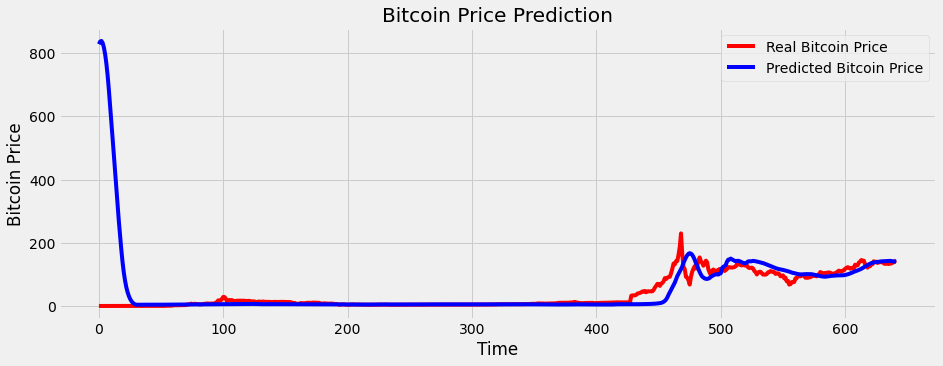

In [161]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color ='red', label = "Real Bitcoin Price")
plt.plot(y_pred, color ='blue', label = "Predicted Bitcoin Price")
plt.title("Bitcoin Price Prediction")
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

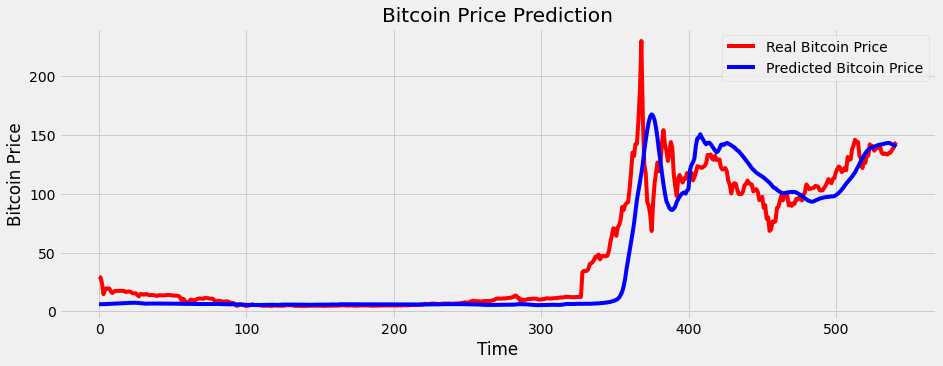

In [163]:
plt.figure(figsize=(14,5))
plt.plot(y_test[100:], color ='red', label = "Real Bitcoin Price")
plt.plot(y_pred[100:], color ='blue', label = "Predicted Bitcoin Price")
plt.title("Bitcoin Price Prediction")
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()